<a href="https://colab.research.google.com/github/Erick-alz/PythonCode/blob/master/Final_project_erick_alvarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction, 202132045
**Questions**

1.-What is the sentiment analysis of donald trump's tweets towards mexico? 
2.-Did donald trump's tweets affect mexican economy?

This analysis firstly explores the sentiment analysis of 55 tweets of Donald Trump, posted over the period starting in June 16, 2015, (when he announced his candidature in the 2016 Republican Party presidential primaries) until February 21, 2017(a month after he was sworn in as president of the United States).

Secondly it investigate whether the comments made by the ex American President Donald Trump on the social network Twitter have an impact on the daily Mexican peso/U.S. dollar currency exchange rate.


In [ ]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
f_folder = "/content/drive/MyDrive/Python_course/Final project/trump tweets analysis/"
f_name_1 = "just_tweets - Sheet1.csv"
f_name_2 = "Just_numbers_b - Sheet1.csv"

f_path_1 = f_folder + f_name_1
f_path_2 = f_folder + f_name_2

donald_tweets= pd.read_csv(f_path_1)
donald_tweets.head(3)




Mounted at /content/drive


,Date,Tweets
0,22/06/2015,Mexico is killing the United States economical...
1,25/06/2015,I love Mexico but not the unfair trade deals t...
2,26/06/2015,Anyone who wants strong borders and good trade...


In [ ]:
donald_tweets.shape

(55, 2)

# Donald Trump Tweets Analysis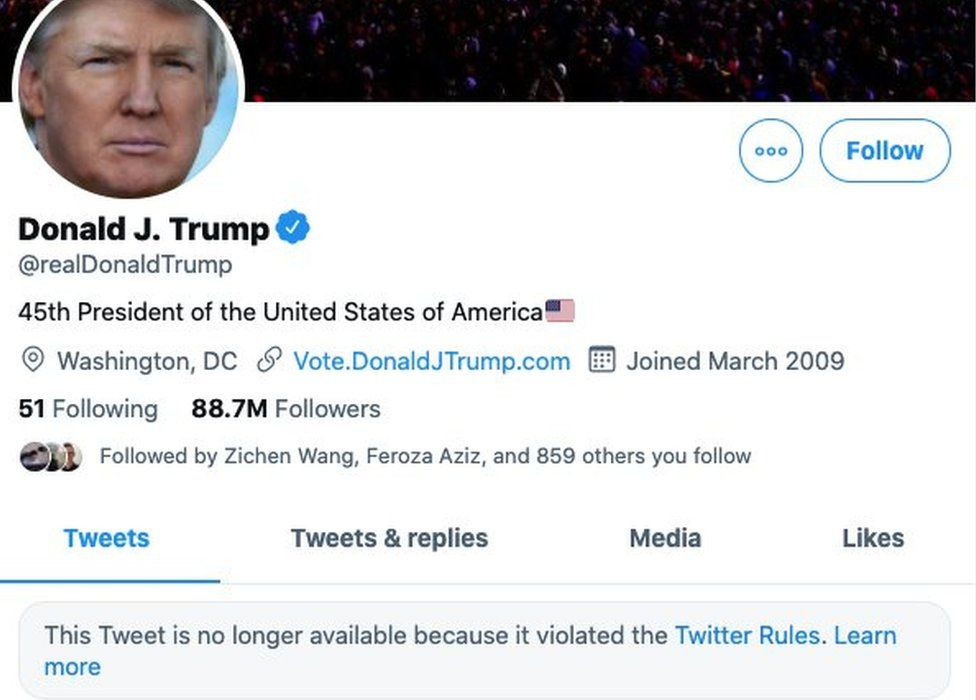

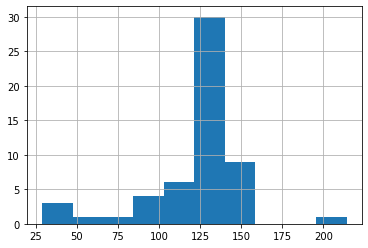

In [ ]:
#number of characters present in each sentence
donald_tweets['Tweets'].str.len().hist()

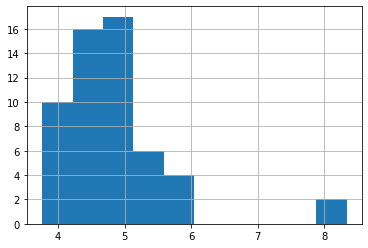

In [ ]:
#Word length in each sentence.
donald_tweets['Tweets'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

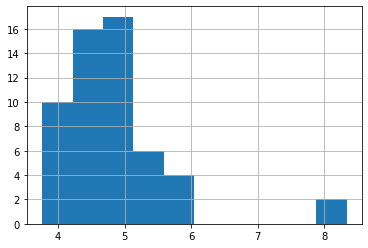

In [ ]:
#word_length_histogram
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()
plot_word_length_histogram(donald_tweets['Tweets'])

In [ ]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<BarContainer object of 10 artists>

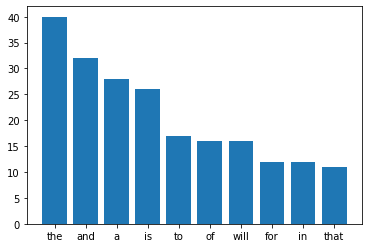

In [ ]:
#I deleted the most commonly words used in any language
corpus=[]
new= donald_tweets['Tweets'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)
#We can evidently see that stopwords such as “the”,” and” and “a” dominate. 

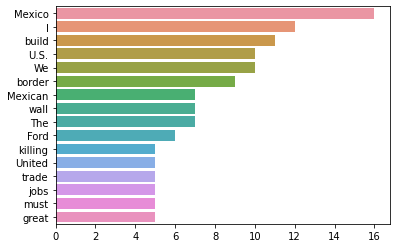

In [ ]:
#Word Frequency
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [ ]:
#Ngram exploration
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

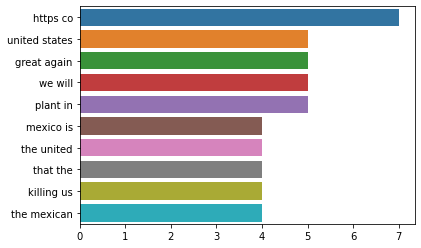

In [ ]:
# Two words
plot_top_ngrams_barchart(donald_tweets['Tweets'],2)

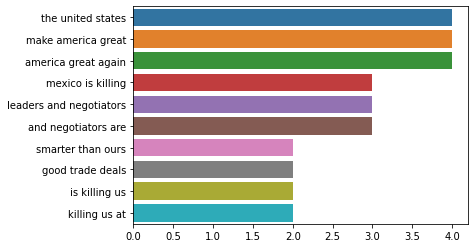

In [ ]:
#Three words
plot_top_ngrams_barchart(donald_tweets['Tweets'],3)

In [ ]:
#Worldcloud
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))
    

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


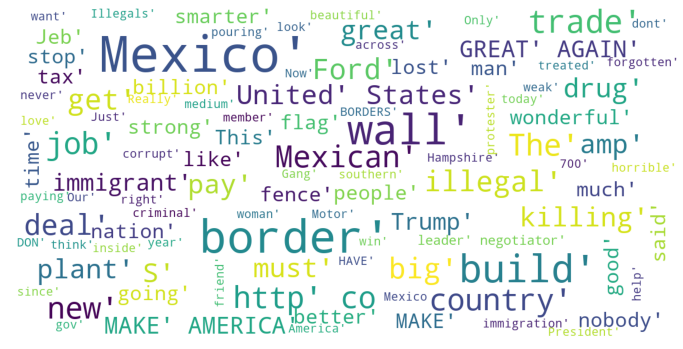

In [ ]:
import nltk
nltk.download('punkt')
nltk.download("wordnet")
plot_wordcloud(donald_tweets['Tweets'])

In [ ]:
from textblob import TextBlob

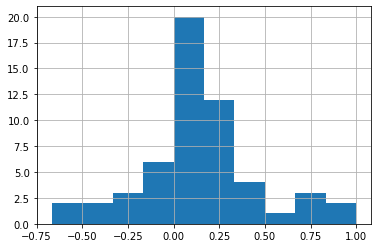

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

donald_tweets['polarity_score']=donald_tweets['Tweets'].\
   apply(lambda x : polarity(x))
donald_tweets['polarity_score'].hist()

<BarContainer object of 3 artists>

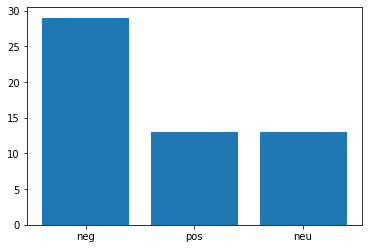

In [ ]:
def sentiment(x):
    if x<0:
        return 'pos'
    elif x==0:
        return 'neu'
    else:
        return 'neg'
    
donald_tweets['polarity']=donald_tweets['polarity_score'].\
   map(lambda x: sentiment(x))

plt.bar(donald_tweets.polarity.value_counts().index,
        donald_tweets.polarity.value_counts())

In [ ]:
donald_tweets[donald_tweets['polarity']=='pos']['Tweets'].head()

1    I love Mexico but not the unfair trade deals t...
3    Only very stupid people think that the United ...
6    I said simply that the Mexican leaders and neg...
7    Mexico’s biggest drug lord escapes from jail. ...
8    Mexicos totally corrupt govt looks horrible wi...
Name: Tweets, dtype: object

In [ ]:
donald_tweets[donald_tweets['polarity']=='neg']['Tweets'].head()

0    Mexico is killing the United States economical...
2    Anyone who wants strong borders and good trade...
4    I love the Mexican people, but Mexico is not o...
5    Mexican leaders and negotiators are much tough...
9    This story is no longer about John McCain, its...
Name: Tweets, dtype: object

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


<BarContainer object of 2 artists>

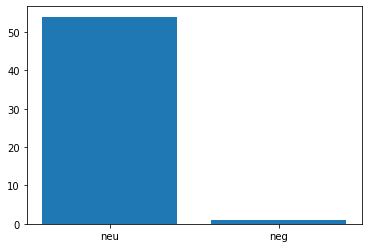

In [ ]:
#Vader sentiment analysis
#VADER sentiment analysis class returns a dictionary that contains the probabilities of the text for being positive, negative and neutral
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

donald_tweets['polarity']=donald_tweets['Tweets'].\
    map(lambda x: get_vader_score(x))
polarity=donald_tweets['polarity'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(polarity.value_counts().index,
        polarity.value_counts())

In [ ]:
#parts of speech tagging in Python
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

def plot_parts_of_speach_barchart(text):
    nltk.download('averaged_perceptron_tagger')

    def _get_pos(text):
        pos=nltk.pos_tag(word_tokenize(text))
        pos=list(map(list,zip(*pos)))[1]
        return pos
    
    tags=text.apply(lambda x : _get_pos(x))
    tags=[x for l in tags for x in l]
    counter=Counter(tags)
    x,y=list(map(list,zip(*counter.most_common(7))))
    
    sns.barplot(x=y,y=x)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


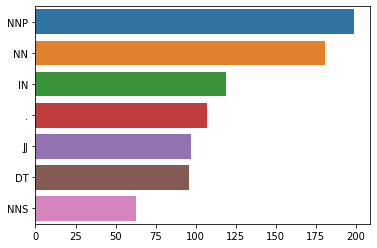

In [ ]:
#There are eight main parts of speech:
#Noun (NN)- Joseph, London, table, cat, teacher, pen, city
#Verb (VB)- read, speak, run, eat, play, live, walk, have, like, are, is
#Adjective(JJ)- beautiful, happy, sad, young, fun, three
#Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow
#Preposition (IN)- at, on, in, from, with, near, between, about, under
#Conjunction (CC)- and, or, but, because, so, yet, unless, since, if
#Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this
#Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!
plot_parts_of_speach_barchart(donald_tweets['Tweets'])

In [ ]:
#Parts of speech(POS)tagging is a method that assigns part of speech labels to words in a sentence
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

def plot_most_common_part_of_speach_barchart(text, part_of_speach='NN'):
    nltk.download('averaged_perceptron_tagger')
    
    def _filter_pos(text):
        pos_type=[]
        pos=nltk.pos_tag(word_tokenize(text))
        for word,tag in pos:
            if tag==part_of_speach:
                pos_type.append(word)
        return pos_type


    words=text.apply(lambda x : _filter_pos(x))
    words=[x for l in words for x in l]
    counter=Counter(words)
    x,y=list(map(list,zip(*counter.most_common(7))))
    sns.barplot(x=y,y=x).set_title(part_of_speach)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


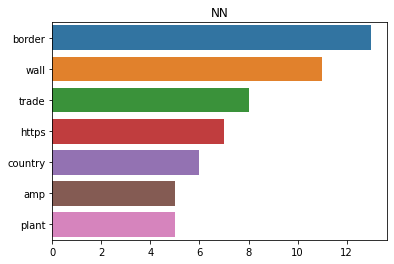

In [ ]:
plot_most_common_part_of_speach_barchart(donald_tweets['Tweets'])

# Mexican Peso Analysis

In [ ]:
mexican_peso = pd.read_csv(f_path_2)
mexican_peso.head()

,Date,Price,Open,High,Low,Change %
0,22/06/2015,15.3415,15.3536,15.3590,15.2795,-0.03%
1,25/06/2015,15.4821,15.4992,15.5208,15.4477,-0.11%
2,26/06/2015,15.5553,15.4820,15.5917,15.4761,0.47%
3,29/06/2015,15.6884,15.6225,15.7191,15.6130,0.86%
4,30/06/2015,15.7389,15.6888,15.7389,15.6253,0.32%


In [ ]:
mexican_peso.rename(columns={'Change %':'Change_percentage'}, inplace =True)
mexican_peso.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change_percentage'], dtype='object')

In [ ]:
 merge_table = pd.merge(donald_tweets, mexican_peso)
 merge_table.columns

Index(['Date', 'Tweets', 'polarity_score', 'polarity', 'Price', 'Open', 'High',
       'Low', 'Change_percentage'],
      dtype='object')

In [ ]:
merge_table.head()


,Date,Tweets,polarity_score,polarity,Price,Open,High,Low,Change_percentage
0,22/06/2015,Mexico is killing the United States economical...,0.212500,1,15.3415,15.3536,15.3590,15.2795,-0.03%
1,25/06/2015,I love Mexico but not the unfair trade deals t...,-0.133333,1,15.4821,15.4992,15.5208,15.4477,-0.11%
2,26/06/2015,Anyone who wants strong borders and good trade...,0.444444,1,15.5553,15.4820,15.5917,15.4761,0.47%
3,29/06/2015,Only very stupid people think that the United ...,-0.041667,1,15.6884,15.6225,15.7191,15.6130,0.86%
4,30/06/2015,"I love the Mexican people, but Mexico is not o...",0.250000,0,15.7389,15.6888,15.7389,15.6253,0.32%


In [ ]:
merge_table["Price"].min()


15.3415

In [ ]:
merge_table["Price"].max()

21.804000000000002

In [ ]:
# I deleted the percentages from the Change_percentage column
for ind, item in enumerate(merge_table["Change_percentage"]):
  merge_table["Change_percentage"][ind] = float(item.strip("%"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(merge_table)

          Date  ... Change_percentage
0   22/06/2015  ...             -0.03
1   25/06/2015  ...             -0.11
2   26/06/2015  ...              0.47
3   29/06/2015  ...              0.86
4   30/06/2015  ...              0.32
5   03/07/2015  ...              0.44
6   06/07/2015  ...             -0.12
7   13/07/2015  ...             -0.07
8   14/07/2015  ...             -0.23
9   21/07/2015  ...             -0.02
10  22/07/2015  ...              0.56
11  27/07/2015  ...              0.14
12  28/07/2015  ...             -0.11
13  29/07/2015  ...               0.1
14  11/08/2015  ...              0.94
15  21/08/2015  ...               1.1
16  25/08/2015  ...              0.03
17  31/08/2015  ...                 0
18  28/09/2015  ...               0.6
19  26/10/2015  ...             -0.37
20  12/11/2015  ...              0.03
21  01/12/2015  ...             -0.33
22  02/12/2015  ...              0.29
23  10/12/2015  ...              0.78
24  07/01/2016  ...               1.8
25  14/01/20

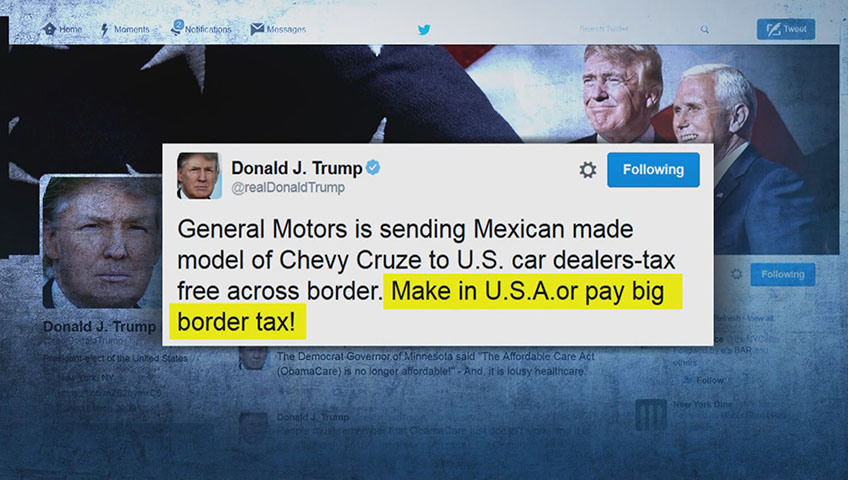

Text(0.5, 1.0, 'Mexican peso-US dollar exchange rate: Jan. 4-6, 2017')

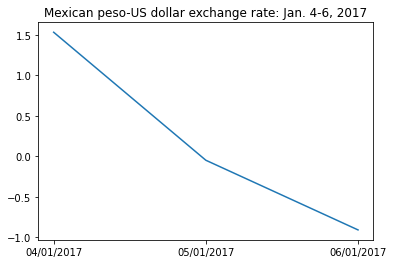

In [ ]:
from pylab import rcParams
plt.plot(merge_table.Date.iloc[46:49], merge_table.Change_percentage[46:49])
rcParams["figure.figsize"] = 15, 8
plt.title("Mexican peso-US dollar exchange rate: Jan. 4-6, 2017")
#with two tweets from we know who, the effect faded away,” Carstens told the Mexican Senate
#On Jan. 5, Trump threatened Toyota with a “big” tax if it opened a new plant in Mexico to assemble cars for sale north of the border.
#A tweet about the financial intricacies of his proposed wall along the US-Mexico border followed on Jan 6.

In [ ]:
donald_tweets.iloc[45:49]

,Date,Tweets,polarity_score,polarity
45,03/01/2017,General Motors is sending Mexican made model o...,0.112500,1
46,04/01/2017,Thank you to Ford for scrapping a new plant in...,0.257576,1
47,05/01/2017,Toyota Motor said will build a new plant in ba...,0.085227,1
48,06/01/2017,"I would build a great wall, and nobody builds ...",0.516667,1


Text(0.5, 1.0, 'Mexican peso-US dollar exchange rate: 31/08/2016   -  08/11/2016')

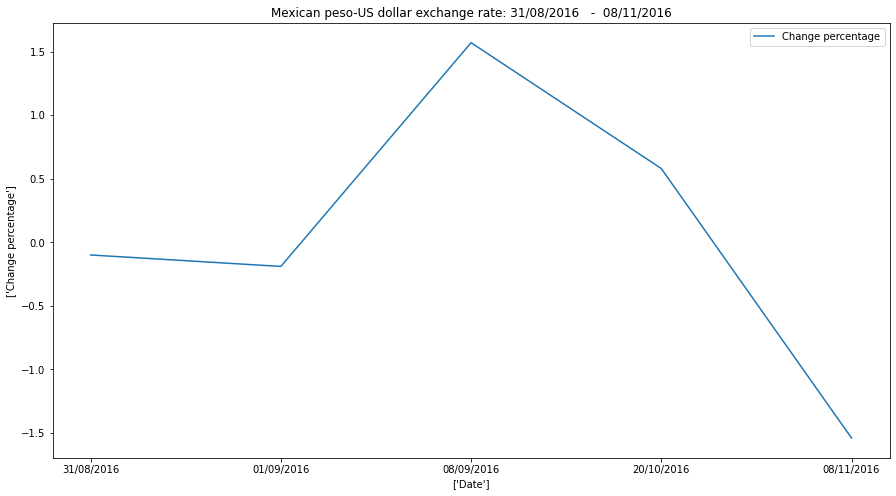

In [ ]:
plt.plot(merge_table.Date.iloc[37:42], merge_table.Change_percentage[37:42])
rcParams["figure.figsize"] = 15, 8
plt.legend(["Change percentage"])
plt.xlabel(["Date"])
plt.ylabel(["Change percentage"])
plt.title("Mexican peso-US dollar exchange rate: 31/08/2016   -  08/11/2016")

In [ ]:
donald_tweets.iloc[37:42]

,Date,Tweets,polarity_score,polarity
37,31/08/2016,Former President Vicente Fox who is railing ag...,0.000000,1
38,01/09/2016,Mexico will pay for the wall!,0.000000,1
39,08/09/2016,Mexico has lost a brilliant finance minister a...,0.686667,1
40,20/10/2016,Drugs are pouring into this country. If we hav...,0.000000,1
41,08/11/2016,TODAY WE MAKE AMERICA GREAT AGAIN!,1.000000,1


# Conclusions



In [ ]:
#Bibliography
#https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
#Class notes notes
#https://mx.investing.com/currencies/usd-mxn-historical-data
